# Data Science major project

Name:Yash Sanghani

### about all the feautures description
age​: the age of an individual

● workclass​: a general term to represent the employment status of an individual
○ Private, Self­emp­not­inc, Self­emp­inc, Federal­gov, Local­gov, State­gov,
Without­pay, Never­worked.

● fnlwgt​: final weight. In other words, this is the number of people the census believes
the entry represents..

● education​: the highest level of education achieved by an individual.
○ Bachelors, Some­college, 11th, HS­grad, Prof­school, Assoc­acdm, Assoc­voc,
9th, 7th­8th, 12th, Masters, 1st­4th, 10th, Doctorate, 5th­6th, Preschool.

● marital­status​: marital status of an individual. Married­civ­spouse corresponds to a
civilian spouse while Married­AF­spouse is a spouse in the Armed Forces
○ Married­civ­spouse, Divorced, Never­married, Separated, Widowed,
Married­spouse­absent, Married­AF­spouse.

● occupation​: the general type of occupation of an individual
○ Tech­support, Craft­repair, Other­service, Sales, Exec­managerial,
Prof­specialty, Handlers­cleaners, Machine­op­inspct, Adm­clerical,
Farming­fishing, Transport­moving, Priv­house­serv, Protective­serv,
Armed­Forces.

● relationship​: represents what this individual is relative to others. For example an
individual could be a Husband. Each entry only has one relationship attribute and is
somewhat redundant with marital status. We might not make use of this attribute at all
○ Wife, Own­child, Husband, Not­in­family, Other­relative, Unmarried.

● race​: Descriptions of an individual’s race
○ White, Asian­Pac­Islander, Amer­Indian­Eskimo, Other, Black.

● sex​: the biological sex of the individual
○ Male, Female

● capital­gain​: capital gains for an individual
○ Integer greater than or equal to 0

● capital­loss​: capital loss for an individual
○ Integer greater than or equal to 0

● hours­per­week​: the hours an individual has reported to work per week
○ continuous.

● native­country​: country of origin for an individual
○ United­States, Cambodia, England, Puerto­Rico, Canada, Germany,
Outlying­US(Guam­USVI­etc), India, Japan, Greece, South, China, Cuba, Iran,
Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,
Ireland, France, Dominican­Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,
Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El­Salvador,
Trinadad&Tobago, Peru, Hong, Holand­Netherlands.

● the label or our target: whether or not an individual makes more than $50,000 annually.
○ <=50k, >50k


### • Project Description:
Problem statement: Create a classification model to predict whether a person makes over $50k a
year


### importing dataframe

### importing crucial libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('adult.csv')
df

39          State-gov   77516    Bachelors   13        Never-married  \
0      50   Self-emp-not-inc   83311    Bachelors   13   Married-civ-spouse   
1      38            Private  215646      HS-grad    9             Divorced   
2      53            Private  234721         11th    7   Married-civ-spouse   
3      28            Private  338409    Bachelors   13   Married-civ-spouse   
4      37            Private  284582      Masters   14   Married-civ-spouse   
...    ..                ...     ...          ...  ...                  ...   
32555  27            Private  257302   Assoc-acdm   12   Married-civ-spouse   
32556  40            Private  154374      HS-grad    9   Married-civ-spouse   
32557  58            Private  151910      HS-grad    9              Widowed   
32558  22            Private  201490      HS-grad    9        Never-married   
32559  52       Self-emp-inc  287927      HS-grad    9   Married-civ-spouse   

             Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0         Exec-managerial         Husband   White     Male      0   0   13   
1       Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2       Handlers-cleaners         Husband   Black     Male      0   0   40   
3          Prof-specialty            Wife   Black   Female      0   0   40   
4         Exec-managerial            Wife   White   Female      0   0   40   
...                   ...             ...     ...      ...    ...  ..  ...   
32555        Tech-support            Wife   White   Female      0   0   38   
32556   Machine-op-inspct         Husband   White     Male      0   0   40   
32557        Adm-clerical       Unmarried   White   Female      0   0   40   
32558        Adm-clerical       Own-child   White     Male      0   0   20   
32559     Exec-managerial            Wife   White   Female  15024   0   40   

        United-States   <=50K  
0       United-States   <=50K  
1       United-States   <=50K  
2       United-States   <=50K  
3                Cuba   <=50K  
4       United-States   <=50K  
...               ...     ...  
32555   United-States   <=50K  
32556   United-States    >50K  
32557   United-States   <=50K  
32558   United-States   <=50K  
32559   United-States    >50K  

[32560 rows x 15 columns]

In [3]:
 df.head(10)

39          State-gov   77516      Bachelors   13           Never-married  \
0  50   Self-emp-not-inc   83311      Bachelors   13      Married-civ-spouse   
1  38            Private  215646        HS-grad    9                Divorced   
2  53            Private  234721           11th    7      Married-civ-spouse   
3  28            Private  338409      Bachelors   13      Married-civ-spouse   
4  37            Private  284582        Masters   14      Married-civ-spouse   
5  49            Private  160187            9th    5   Married-spouse-absent   
6  52   Self-emp-not-inc  209642        HS-grad    9      Married-civ-spouse   
7  31            Private   45781        Masters   14           Never-married   
8  42            Private  159449      Bachelors   13      Married-civ-spouse   
9  37            Private  280464   Some-college   10      Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   
5       Other-service   Not-in-family   Black   Female      0   0   16   
6     Exec-managerial         Husband   White     Male      0   0   45   
7      Prof-specialty   Not-in-family   White   Female  14084   0   50   
8     Exec-managerial         Husband   White     Male   5178   0   40   
9     Exec-managerial         Husband   Black     Male      0   0   80   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  
4   United-States   <=50K  
5         Jamaica   <=50K  
6   United-States    >50K  
7   United-States    >50K  
8   United-States    >50K  
9   United-States    >50K

### firstly we rename the column names

In [4]:
 df= df.rename({'39':'age',' State-gov':'workclass',' 77516':'fnlwgt',
                          ' Bachelors':'Education',
                         ' 13':'education_num',
                         ' Adm-clerical':'occupation',
                          ' Never-married':'marital_status',
                         ' Not-in-family':'relationship',
                          ' White':'race',
                          ' Male':'sex',
                          ' 2174':'capital_gain',
                         ' 0':'capital_loss',
                          ' 40':'hours_per_week',
                          ' United-States':'native_country',
                          ' <=50K':'Target'},axis=1)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  Target          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df

age          workclass  fnlwgt    Education  education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  hours_per_week  native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Target  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

### finally,we rename the columns  with  meaningful names based on the rowinformation

In [7]:
df.tail(10)

age      workclass  fnlwgt      Education  education_num  \
32550   32        Private   34066           10th              6   
32551   43        Private   84661      Assoc-voc             11   
32552   32        Private  116138        Masters             14   
32553   53        Private  321865        Masters             14   
32554   22        Private  310152   Some-college             10   
32555   27        Private  257302     Assoc-acdm             12   
32556   40        Private  154374        HS-grad              9   
32557   58        Private  151910        HS-grad              9   
32558   22        Private  201490        HS-grad              9   
32559   52   Self-emp-inc  287927        HS-grad              9   

            marital_status          occupation    relationship  \
32550   Married-civ-spouse   Handlers-cleaners         Husband   
32551   Married-civ-spouse               Sales         Husband   
32552        Never-married        Tech-support   Not-in-family   
32553   Married-civ-spouse     Exec-managerial         Husband   
32554        Never-married     Protective-serv   Not-in-family   
32555   Married-civ-spouse        Tech-support            Wife   
32556   Married-civ-spouse   Machine-op-inspct         Husband   
32557              Widowed        Adm-clerical       Unmarried   
32558        Never-married        Adm-clerical       Own-child   
32559   Married-civ-spouse     Exec-managerial            Wife   

                      race      sex  capital_gain  capital_loss  \
32550   Amer-Indian-Eskimo     Male             0             0   
32551                White     Male             0             0   
32552   Asian-Pac-Islander     Male             0             0   
32553                White     Male             0             0   
32554                White     Male             0             0   
32555                White   Female             0             0   
32556                White     Male             0             0   
32557                White   Female             0             0   
32558                White     Male             0             0   
32559                White   Female         15024             0   

       hours_per_week  native_country  Target  
32550              40   United-States   <=50K  
32551              45   United-States   <=50K  
32552              11          Taiwan   <=50K  
32553              40   United-States    >50K  
32554              40   United-States   <=50K  
32555              38   United-States   <=50K  
32556              40   United-States    >50K  
32557              40   United-States   <=50K  
32558              20   United-States   <=50K  
32559              40   United-States    >50K

### null values

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
Target            0
dtype: int64

In [9]:
## we have no null values 

### duplicates

In [10]:
df.duplicated().sum()

24

### we have 24 duplictes lets drop

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df

age          workclass  fnlwgt    Education  education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  hours_per_week  native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Target  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32536 rows x 15 columns]

In [13]:
df.shape

(32536, 15)

In [14]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'Education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'Target'],
      dtype='object')

### unique values in  the dataframe

In [15]:
for i in  df.columns:
    print(i,'-----',df[i].nunique())

age ----- 73
workclass ----- 9
fnlwgt ----- 21647
Education ----- 16
education_num ----- 16
marital_status ----- 7
occupation ----- 15
relationship ----- 6
race ----- 5
sex ----- 2
capital_gain ----- 119
capital_loss ----- 92
hours_per_week ----- 94
native_country ----- 42
Target ----- 2


# Replacing the ?

In [16]:
df.replace({' ?':np.nan},inplace=True)
df.fillna(method='ffill',inplace=True)

In [17]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
Target            0
dtype: int64

### categorical values


In [18]:
df.describe(include='object')

workclass Education       marital_status       occupation relationship  \
count      32536     32536                32536            32536        32536   
unique         8        16                    7               14            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       24072     10494                14970             4383        13187   

          race    sex  native_country  Target  
count    32536  32536           32536   32536  
unique       5      2              41       2  
top      White   Male   United-States   <=50K  
freq     27794  21774           29675   24697

### numerical values

In [19]:
df.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32536.000000  3.253600e+04   32536.000000  32536.000000  32536.000000   
mean      38.585536  1.897843e+05      10.081725   1078.410069     87.370912   
std       13.638193  1.055563e+05       2.571622   7388.068465    403.107737   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.369932e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32536.000000  
mean        40.440343  
std         12.347079  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [20]:
df

age          workclass  fnlwgt    Education  education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  hours_per_week  native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Target  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32536 rows x 15 columns]

### univariate analysis

In [21]:
df

age          workclass  fnlwgt    Education  education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  hours_per_week  native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Target  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32536 rows x 15 columns]

In [22]:
 df['workclass'].value_counts()

 Private             24072
 Self-emp-not-inc     2686
 Local-gov            2204
 State-gov            1373
 Self-emp-inc         1177
 Federal-gov          1002
 Without-pay            15
 Never-worked            7
Name: workclass, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relationship', ylabel='count'>

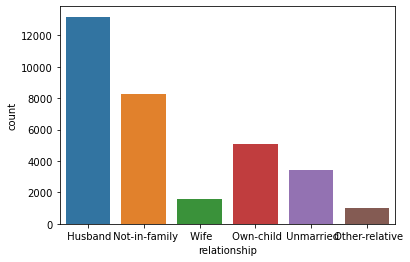

In [23]:
sns.countplot(df['relationship'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race', ylabel='count'>

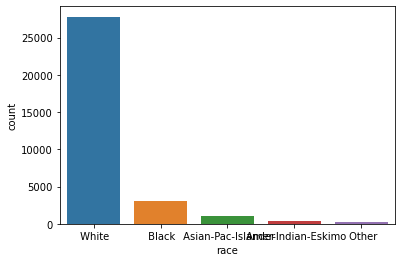

In [24]:
sns.countplot(df['race'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

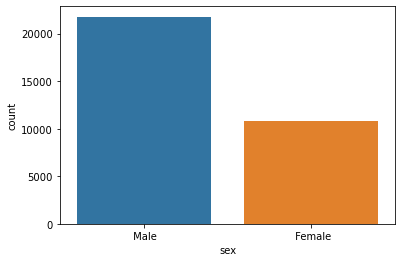

In [25]:
sns.countplot(df['sex'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

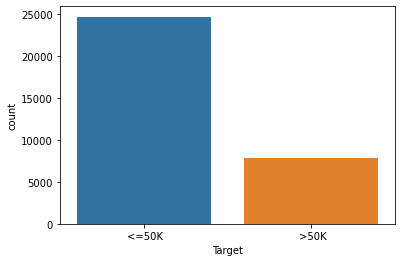

In [26]:
sns.countplot(df['Target'])

In [27]:
df['Education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

<AxesSubplot:xlabel='education_num', ylabel='Count'>

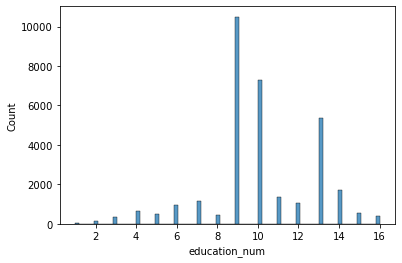

In [28]:
sns.histplot(df['education_num'])

<AxesSubplot:xlabel='capital_gain', ylabel='Count'>

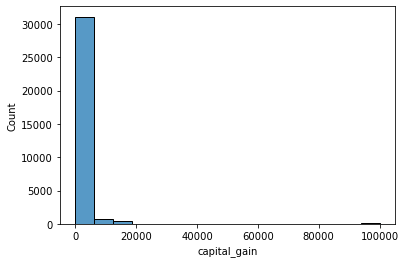

In [29]:
sns.histplot(df['capital_gain'])

<AxesSubplot:xlabel='capital_loss', ylabel='Count'>

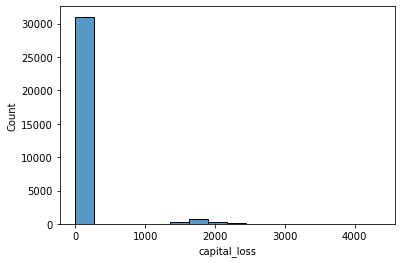

In [30]:
sns.histplot(df['capital_loss'])

<AxesSubplot:xlabel='hours_per_week', ylabel='Count'>

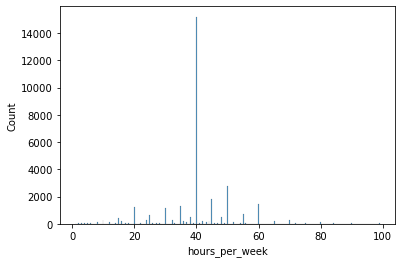

In [31]:
 sns.histplot(df['hours_per_week'])

In [32]:
df['occupation'].value_counts()

 Prof-specialty       4383
 Craft-repair         4358
 Exec-managerial      4315
 Adm-clerical         3979
 Sales                3863
 Other-service        3467
 Machine-op-inspct    2132
 Transport-moving     1703
 Handlers-cleaners    1470
 Farming-fishing      1036
 Tech-support          980
 Protective-serv       683
 Priv-house-serv       157
 Armed-Forces           10
Name: occupation, dtype: int64

In [33]:
df['occupation'].fillna(value = 'Prof-specialty', inplace = True)

In [34]:
df['occupation'].value_counts()

 Prof-specialty       4383
 Craft-repair         4358
 Exec-managerial      4315
 Adm-clerical         3979
 Sales                3863
 Other-service        3467
 Machine-op-inspct    2132
 Transport-moving     1703
 Handlers-cleaners    1470
 Farming-fishing      1036
 Tech-support          980
 Protective-serv       683
 Priv-house-serv       157
 Armed-Forces           10
Name: occupation, dtype: int64

## bivarient analysis based on target

<AxesSubplot:xlabel='count', ylabel='relationship'>

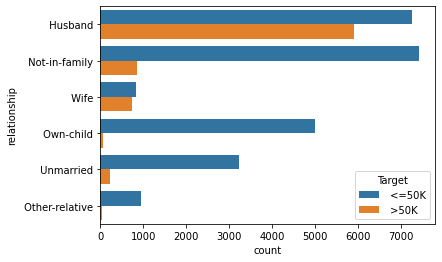

In [35]:
sns.countplot(hue=df['Target'],y=df['relationship'])

<AxesSubplot:xlabel='count', ylabel='occupation'>

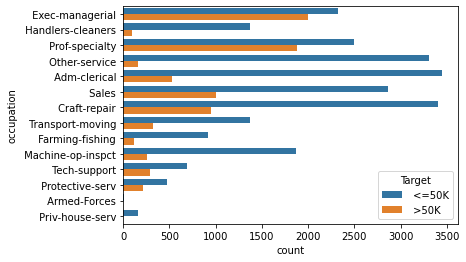

In [36]:
sns.countplot(hue=df['Target'],y=df['occupation'])

<AxesSubplot:xlabel='count', ylabel='Education'>

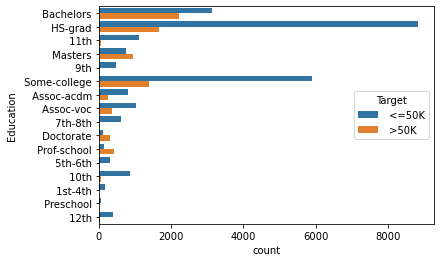

In [37]:
sns.countplot(hue=df['Target'],y=df['Education'])

<AxesSubplot:xlabel='count', ylabel='marital_status'>

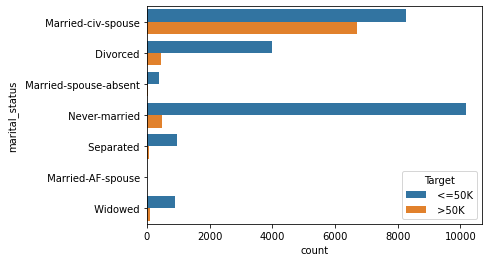

In [38]:
sns.countplot(hue=df['Target'],y=df['marital_status'])

<AxesSubplot:xlabel='count', ylabel='occupation'>

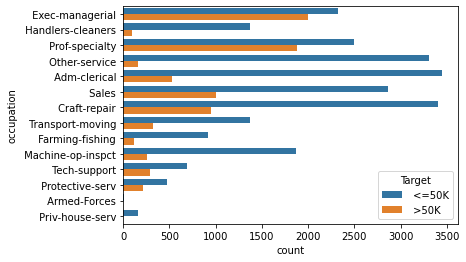

In [39]:
sns.countplot(hue=df['Target'],y=df['occupation'])

<AxesSubplot:xlabel='count', ylabel='relationship'>

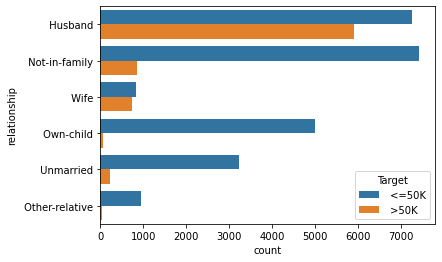

In [40]:
sns.countplot(hue=df['Target'],y=df['relationship'])

<AxesSubplot:xlabel='count', ylabel='race'>

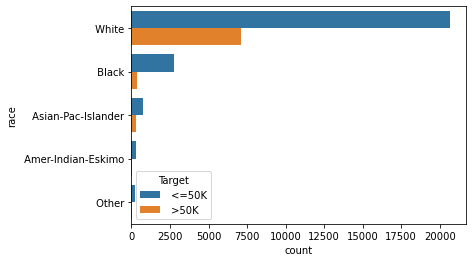

In [41]:
sns.countplot(hue=df['Target'],y=df['race'])

<AxesSubplot:xlabel='count', ylabel='sex'>

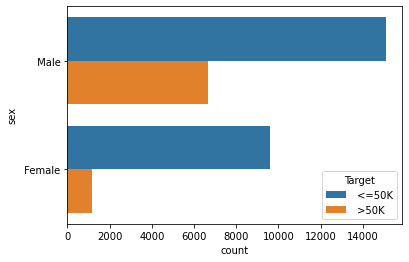

In [42]:
sns.countplot(hue=df['Target'],y=df['sex'])

<AxesSubplot:xlabel='capital_gain', ylabel='Target'>

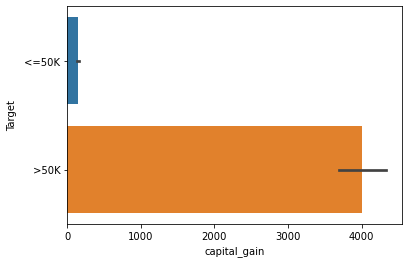

In [43]:
sns.barplot(x=df['capital_gain'],y=df['Target'])

<AxesSubplot:xlabel='capital_loss', ylabel='Target'>

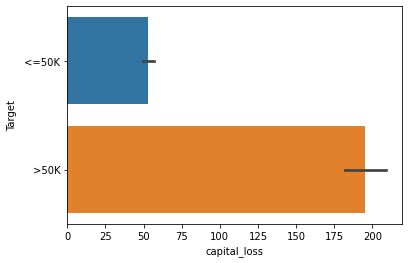

In [44]:
sns.barplot(x=df['capital_loss'],y=df['Target'])

<AxesSubplot:xlabel='hours_per_week', ylabel='Target'>

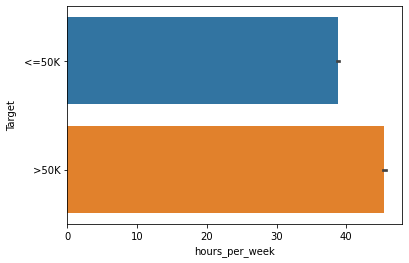

In [45]:
sns.barplot(x=df['hours_per_week'],y=df['Target'])

### Split data into training and testing data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
def multicolumnlabelencoder(l,df):
    from sklearn.preprocessing import LabelEncoder
    lb=LabelEncoder()
    for i in l:
        df[i]=lb.fit_transform(df[i])

In [25]:
l=['Education','workclass','marital_status','occupation','relationship','race','sex','native_country','Target']
multicolumnlabelencoder(l,df)
df.head()

age  workclass  fnlwgt  Education  education_num  marital_status  \
0   50          5   83311          9             13               2   
1   38          3  215646         11              9               0   
2   53          3  234721          1              7               2   
3   28          3  338409          9             13               2   
4   37          3  284582         12             14               2   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           3             0     4    1             0             0   
1           5             1     4    1             0             0   
2           5             0     2    1             0             0   
3           9             5     2    0             0             0   
4           3             5     4    0             0             0   

   hours_per_week  native_country  Target  
0              13              38       0  
1              40              38       0  
2              40              38       0  
3              40               4       0  
4              40              38       0

In [26]:
df

age  workclass  fnlwgt  Education  education_num  marital_status  \
0       50          5   83311          9             13               2   
1       38          3  215646         11              9               0   
2       53          3  234721          1              7               2   
3       28          3  338409          9             13               2   
4       37          3  284582         12             14               2   
...    ...        ...     ...        ...            ...             ...   
32555   27          3  257302          7             12               2   
32556   40          3  154374         11              9               2   
32557   58          3  151910         11              9               6   
32558   22          3  201490         11              9               4   
32559   52          4  287927         11              9               2   

       occupation  relationship  race  sex  capital_gain  capital_loss  \
0               3             0     4    1             0             0   
1               5             1     4    1             0             0   
2               5             0     2    1             0             0   
3               9             5     2    0             0             0   
4               3             5     4    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32555          12             5     4    0             0             0   
32556           6             0     4    1             0             0   
32557           0             4     4    0             0             0   
32558           0             3     4    1             0             0   
32559           3             5     4    0         15024             0   

       hours_per_week  native_country  Target  
0                  13              38       0  
1                  40              38       0  
2                  40              38       0  
3                  40               4       0  
4                  40              38       0  
...               ...             ...     ...  
32555              38              38       0  
32556              40              38       1  
32557              40              38       0  
32558              20              38       0  
32559              40              38       1  

[32536 rows x 15 columns]

### it would be converted into the numrical values

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32536 non-null  int64
 1   workclass       32536 non-null  int32
 2   fnlwgt          32536 non-null  int64
 3   Education       32536 non-null  int32
 4   education_num   32536 non-null  int64
 5   marital_status  32536 non-null  int32
 6   occupation      32536 non-null  int32
 7   relationship    32536 non-null  int32
 8   race            32536 non-null  int32
 9   sex             32536 non-null  int32
 10  capital_gain    32536 non-null  int64
 11  capital_loss    32536 non-null  int64
 12  hours_per_week  32536 non-null  int64
 13  native_country  32536 non-null  int32
 14  Target          32536 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.9 MB


In [51]:
#0----><=50K,1---->>50K

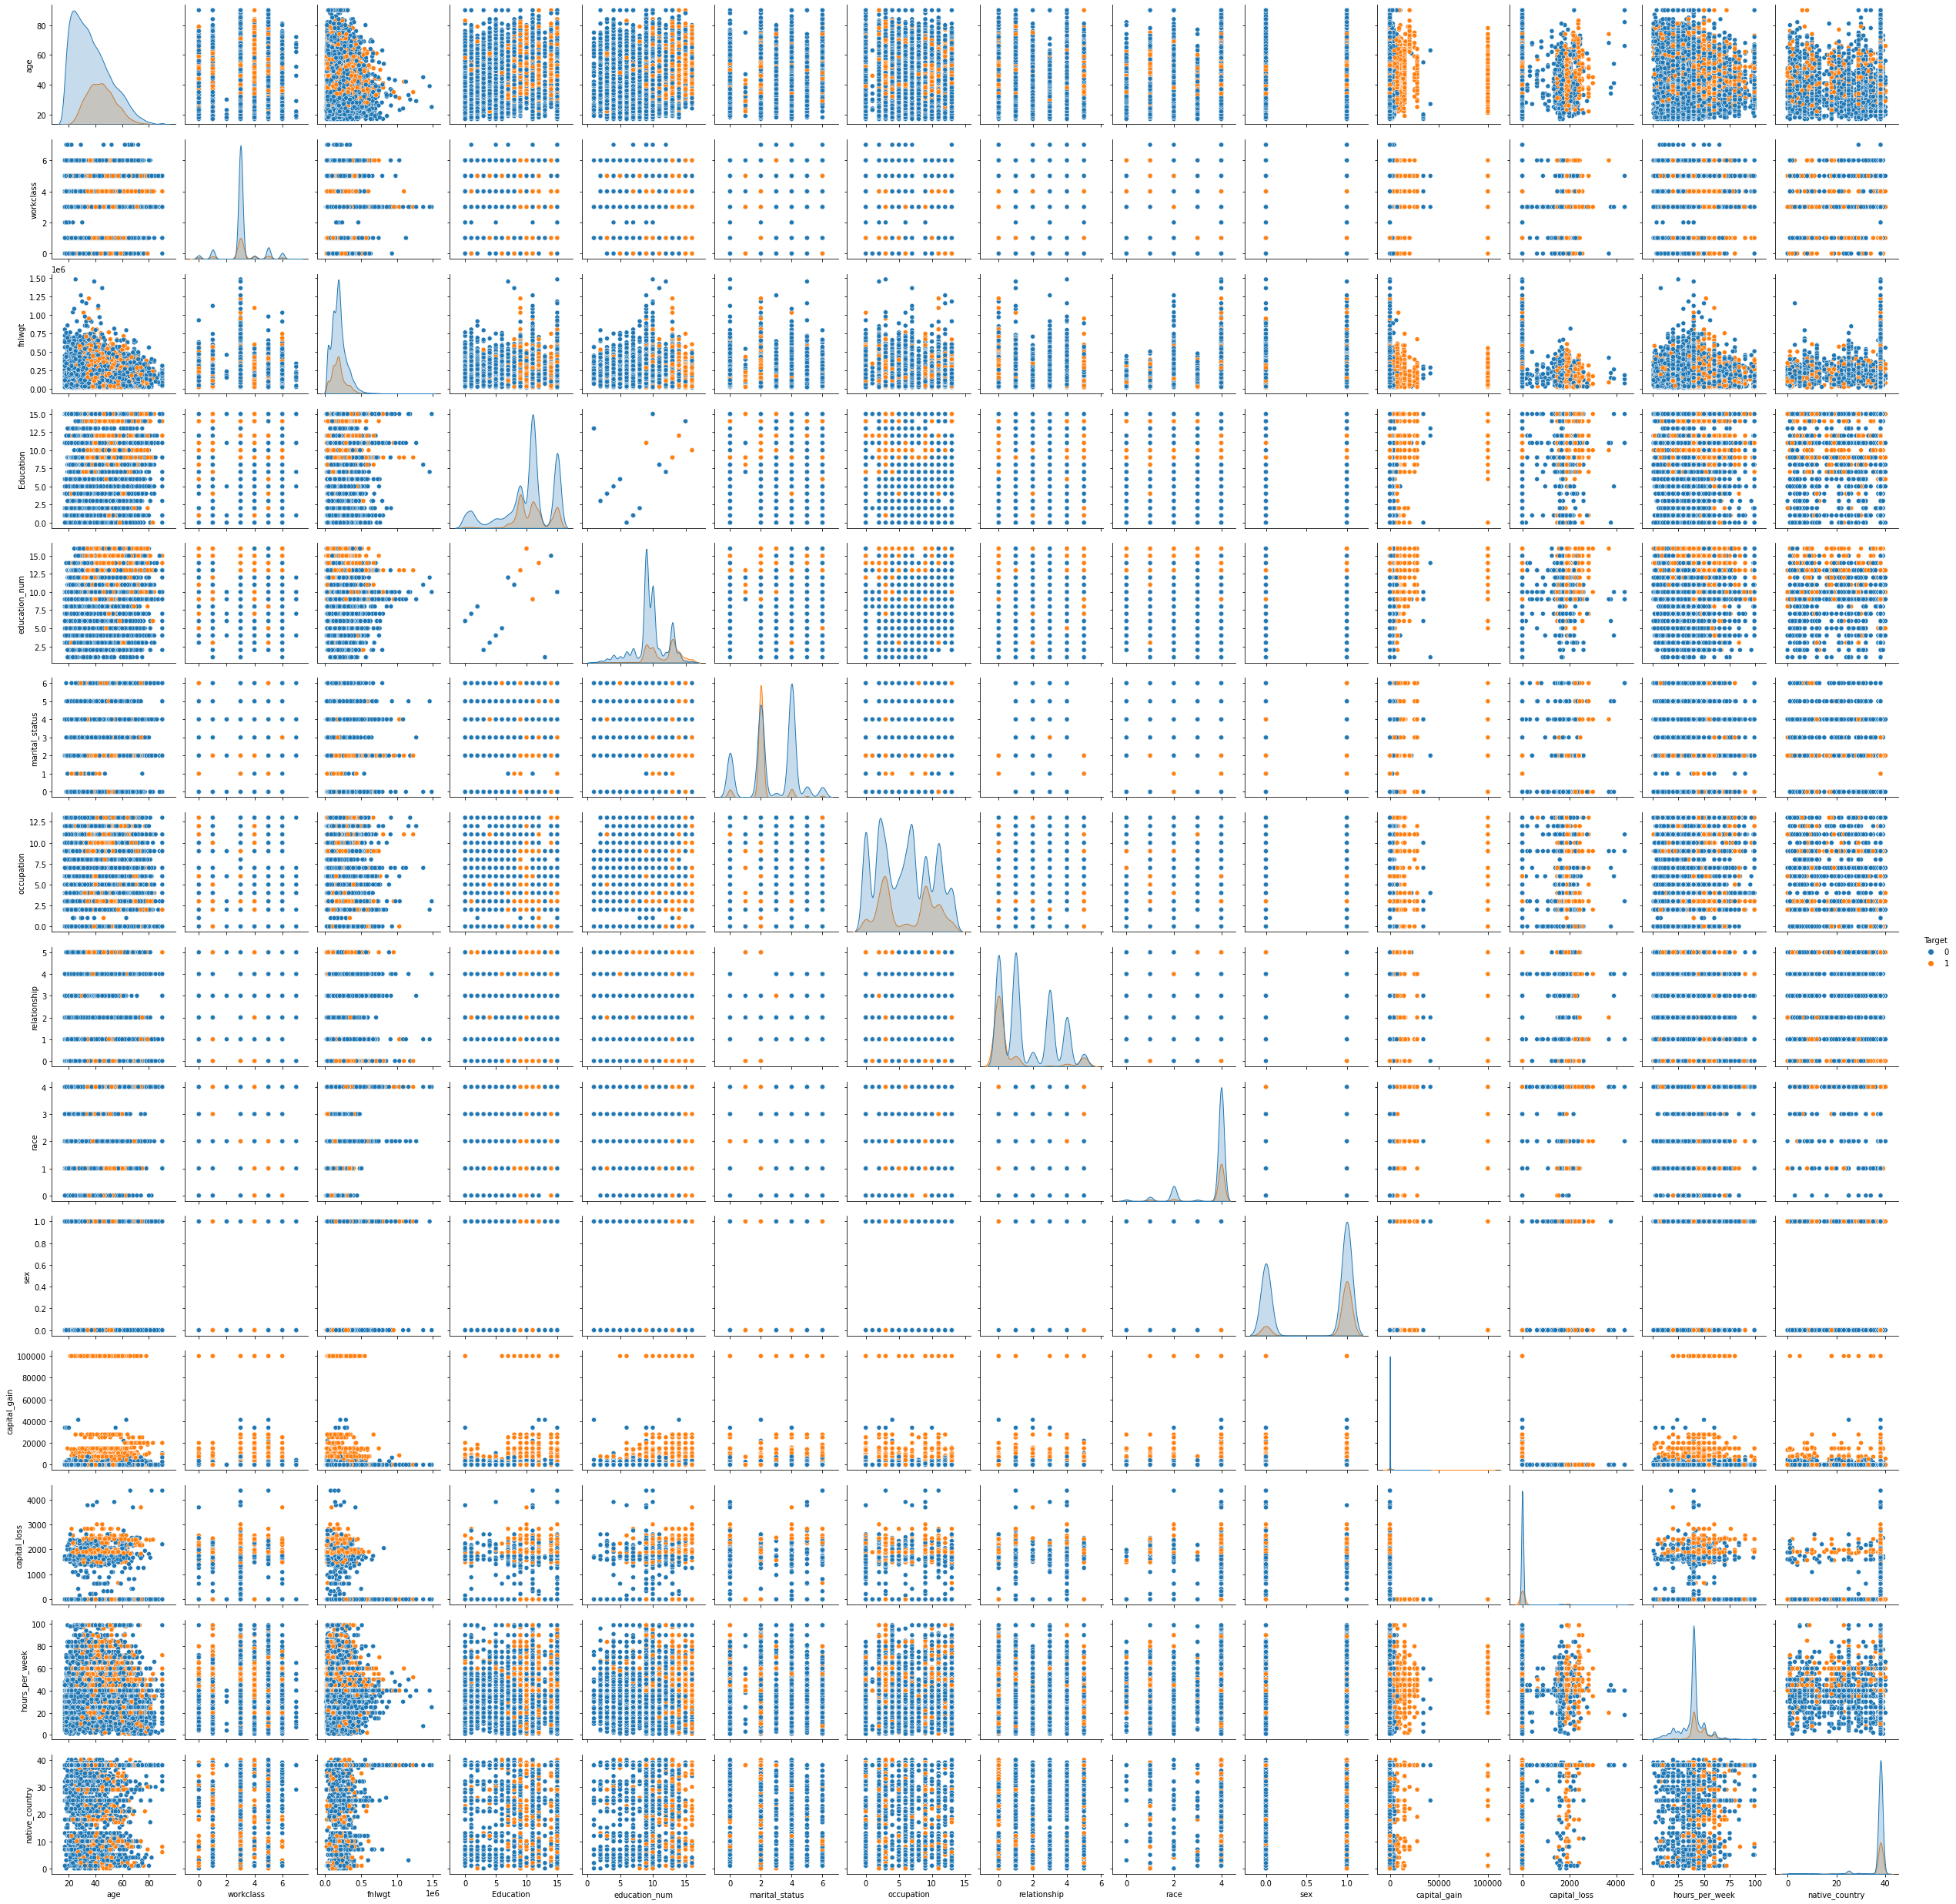

In [52]:
sns.pairplot(df,hue='Target')

# Dropping the irrelevant columns

In [28]:
df.corr()

age  workclass    fnlwgt  Education  education_num  \
age             1.000000   0.038591 -0.076448  -0.010551       0.036224   
workclass       0.038591   1.000000 -0.022416   0.002704       0.001880   
fnlwgt         -0.076448  -0.022416  1.000000  -0.028065      -0.043353   
Education      -0.010551   0.002704 -0.028065   1.000000       0.359105   
education_num   0.036224   0.001880 -0.043353   0.359105       1.000000   
marital_status -0.266142  -0.016964  0.028154  -0.038413      -0.069196   
occupation     -0.008277   0.009903  0.000540  -0.033578       0.084764   
relationship   -0.263744  -0.054385  0.008859  -0.011060      -0.094424   
race            0.029116   0.044800 -0.021484   0.014307       0.031998   
sex             0.088708   0.068164  0.027113  -0.027426       0.012181   
capital_gain    0.077676   0.029952  0.000433   0.030086       0.122661   
capital_loss    0.057745   0.001933 -0.010267   0.016790       0.079901   
hours_per_week  0.068515   0.034384 -0.018900   0.055991       0.148426   
native_country -0.001519  -0.002712 -0.062809   0.075552       0.087004   
Target          0.234039   0.000394 -0.009521   0.079361       0.335299   

                marital_status  occupation  relationship      race       sex  \
age                  -0.266142   -0.008277     -0.263744  0.029116  0.088708   
workclass            -0.016964    0.009903     -0.054385  0.044800  0.068164   
fnlwgt                0.028154    0.000540      0.008859 -0.021484  0.027113   
Education            -0.038413   -0.033578     -0.011060  0.014307 -0.027426   
education_num        -0.069196    0.084764     -0.094424  0.031998  0.012181   
marital_status        1.000000    0.022923      0.185542 -0.067942 -0.129425   
occupation            0.022923    1.000000     -0.048559  0.000468  0.057092   
relationship          0.185542   -0.048559      1.000000 -0.116048 -0.582593   
race                 -0.067942    0.000468     -0.116048  1.000000  0.087464   
sex                  -0.129425    0.057092     -0.582593  0.087464  1.000000   
capital_gain         -0.043373    0.020533     -0.057945  0.011152  0.048486   
capital_loss         -0.034134    0.010919     -0.061100  0.018916  0.045576   
hours_per_week       -0.190433    0.014776     -0.248876  0.041921  0.229190   
native_country       -0.022061   -0.004435     -0.010895  0.118885  0.000296   
Target               -0.199187    0.046904     -0.250955  0.071855  0.215984   

                capital_gain  capital_loss  hours_per_week  native_country  \
age                 0.077676      0.057745        0.068515       -0.001519   
workclass           0.029952      0.001933        0.034384       -0.002712   
fnlwgt              0.000433     -0.010267       -0.018900       -0.062809   
Education           0.030086      0.016790        0.055991        0.075552   
education_num       0.122661      0.079901        0.148426        0.087004   
marital_status     -0.043373     -0.034134       -0.190433       -0.022061   
occupation          0.020533      0.010919        0.014776       -0.004435   
relationship       -0.057945     -0.061100       -0.248876       -0.010895   
race                0.011152      0.018916        0.041921        0.118885   
sex                 0.048486      0.045576        0.229190        0.000296   
capital_gain        1.000000     -0.031638        0.078408        0.008643   
capital_loss       -0.031638      1.000000        0.054229        0.008667   
hours_per_week      0.078408      0.054229        1.000000        0.005744   
native_country      0.008643      0.008667        0.005744        1.000000   
Target              0.223340      0.150498        0.229659        0.022917   

                  Target  
age             0.234039  
workclass       0.000394  
fnlwgt         -0.009521  
Education       0.079361  
education_num   0.335299  
marital_status -0.199187  
occupation      0.046904  
relationship   -0.250955  
race            0.071855  
sex             0.21

<AxesSubplot:>

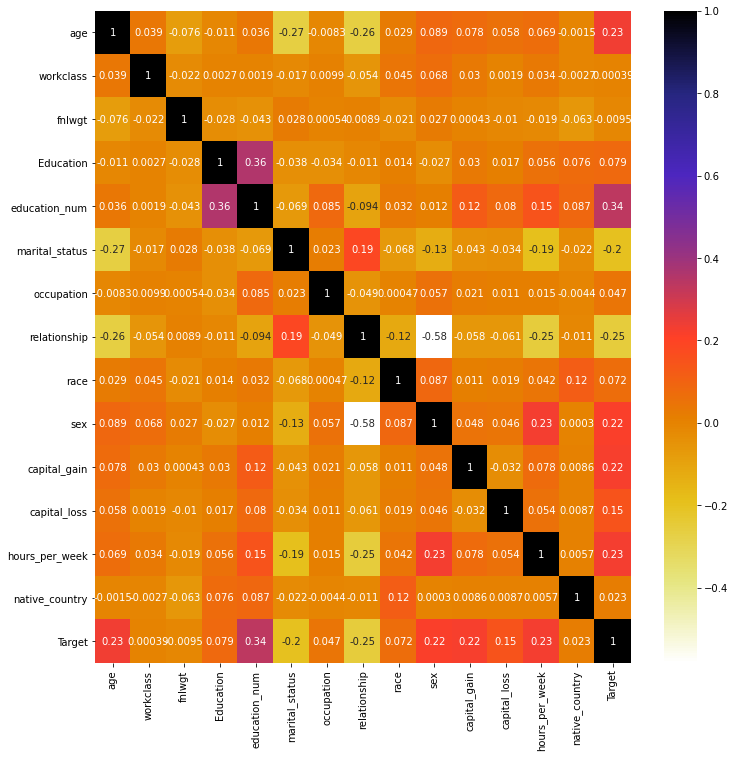

In [29]:
plt1=plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.CMRmap_r)

In [30]:
corrr=df.corr()
corrr['Target'].sort_values(ascending=False)


Target            1.000000
education_num     0.335299
age               0.234039
hours_per_week    0.229659
capital_gain      0.223340
sex               0.215984
capital_loss      0.150498
Education         0.079361
race              0.071855
occupation        0.046904
native_country    0.022917
workclass         0.000394
fnlwgt           -0.009521
marital_status   -0.199187
relationship     -0.250955
Name: Target, dtype: float64

In [31]:
#As we can see that features like fnlwgt and workclass are highly irrelevent so lets drop those
df.drop('fnlwgt',axis=1,inplace=True)
df.head()

age  workclass  Education  education_num  marital_status  occupation  \
0   50          5          9             13               2           3   
1   38          3         11              9               0           5   
2   53          3          1              7               2           5   
3   28          3          9             13               2           9   
4   37          3         12             14               2           3   

   relationship  race  sex  capital_gain  capital_loss  hours_per_week  \
0             0     4    1             0             0              13   
1             1     4    1             0             0              40   
2             0     2    1             0             0              40   
3             5     2    0             0             0              40   
4             5     4    0             0             0              40   

   native_country  Target  
0              38       0  
1              38       0  
2              38       0  
3               4       0  
4              38       0

In [32]:
df.drop('workclass',axis=1,inplace=True)
df.head()

age  Education  education_num  marital_status  occupation  relationship  \
0   50          9             13               2           3             0   
1   38         11              9               0           5             1   
2   53          1              7               2           5             0   
3   28          9             13               2           9             5   
4   37         12             14               2           3             5   

   race  sex  capital_gain  capital_loss  hours_per_week  native_country  \
0     4    1             0             0              13              38   
1     4    1             0             0              40              38   
2     2    1             0             0              40              38   
3     2    0             0             0              40               4   
4     4    0             0             0              40              38   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0

### from these we say how we separable based on  the target and how to classify the data

In [33]:
x=df.drop('Target',axis=1)
y=df['Target']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [35]:
x_train

age  Education  education_num  marital_status  occupation  \
16060   30         11              9               4           2   
18119   20         15             10               4           5   
18753   25         11              9               4           2   
20534   35         11              9               2          10   
4585    21         11              9               4           0   
...    ...        ...            ...             ...         ...   
29823   18         11              9               4           5   
5392    29          8             11               4          12   
860     43         11              9               2           4   
15801   44         15             10               0           3   
23669   26         15             10               4           5   

       relationship  race  sex  capital_gain  capital_loss  hours_per_week  \
16060             1     4    1             0             0              40   
18119             3     4    1             0             0              25   
18753             1     4    1             0             0              35   
20534             0     2    1          7298             0              35   
4585              1     4    0             0             0              35   
...             ...   ...  ...           ...           ...             ...   
29823             3     2    1             0             0              40   
5392              1     4    0             0          1590              64   
860               0     4    1             0             0              40   
15801             1     4    1             0             0              50   
23669             3     4    1             0             0              12   

       native_country  
16060              38  
18119              38  
18753              38  
20534              38  
4585               38  
...               ...  
29823              38  
5392               38  
860                25  
15801              38  
23669              38  

[21799 rows x 12 columns]

In [36]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Target, Length: 32536, dtype: int32

In [37]:
df['Target'].value_counts()

0    24697
1     7839
Name: Target, dtype: int64

### we see that imbalance in the data so we balance the data using smote from imblearn......

In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier


### now see we balance the data by oversampling

### now apply the model

In [39]:
def model_output(x,y,z,m):
    smote=SMOTE(random_state = 101)
    x_oversample, y_oversample = smote.fit_resample(x, y)
    x_train,x_test,y_train,y_test=train_test_split(x_oversample,y_oversample,test_size=z)
    x_train, x_test, y_train, y_test = train_test_split(x_oversample, y_oversample, test_size=z, random_state=42)
    print('shape of x_train is',x_train.shape)
    print('shape of y_train is',y_train.shape)
    print('shape of x_test is',x_test.shape)
    print('shape of y_test is',y_test.shape)
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('training score of the model is',':',m.score(x_train,y_train))
    print('confusion matrics of the model is','is\n',confusion_matrix(y_test,y_pred))
    print('Classification report of the is\n',classification_report(y_test,y_pred))
    print('accuracy score of given model is:',accuracy_score(y_test,y_pred))
    print('misclassification for the model is',1-accuracy_score(y_test,y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g')


# 1)Logistic Regression

shape of x_train is (33093, 12)
shape of y_train is (33093,)
shape of x_test is (16301, 12)
shape of y_test is (16301,)
training score of the model is : 0.7686519807814342
confusion matrics of the model is is
 [[6322 1891]
 [1878 6210]]
Classification report of the is
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      8213
           1       0.77      0.77      0.77      8088

    accuracy                           0.77     16301
   macro avg       0.77      0.77      0.77     16301
weighted avg       0.77      0.77      0.77     16301

accuracy score of given model is: 0.7687871909698791
misclassification for the model is 0.23121280903012087


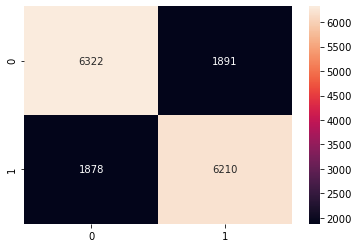

In [63]:
m1=LogisticRegression(max_iter=33000)
model_output(x,y,0.33,m1)

## 2)KNN Classifiers

shape of x_train is (33093, 12)
shape of y_train is (33093,)
shape of x_test is (16301, 12)
shape of y_test is (16301,)
training score of the model is : 0.8521137400658749
confusion matrics of the model is is
 [[6229 1984]
 [ 793 7295]]
Classification report of the is
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      8213
           1       0.79      0.90      0.84      8088

    accuracy                           0.83     16301
   macro avg       0.84      0.83      0.83     16301
weighted avg       0.84      0.83      0.83     16301

accuracy score of given model is: 0.8296423532298632
misclassification for the model is 0.17035764677013676


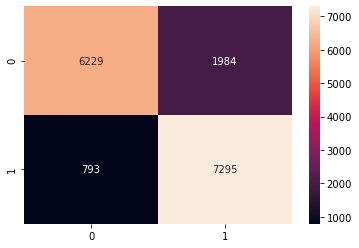

In [64]:
params_knn={'n_neighbors':list(range(15,21,2))}
knn=KNeighborsClassifier()
m2=GridSearchCV(knn,param_grid=params_knn,scoring='accuracy')
model_output(x,y,0.33,m2)

In [65]:
print(m2.best_params_)

{'n_neighbors': 15}


# 3)Decision Tree Classifiers

shape of x_train is (33093, 12)
shape of y_train is (33093,)
shape of x_test is (16301, 12)
shape of y_test is (16301,)
training score of the model is : 0.8689450941286677
confusion matrics of the model is is
 [[6650 1563]
 [ 873 7215]]
Classification report of the is
               precision    recall  f1-score   support

           0       0.88      0.81      0.85      8213
           1       0.82      0.89      0.86      8088

    accuracy                           0.85     16301
   macro avg       0.85      0.85      0.85     16301
weighted avg       0.85      0.85      0.85     16301

accuracy score of given model is: 0.8505613152567327
misclassification for the model is 0.14943868474326727


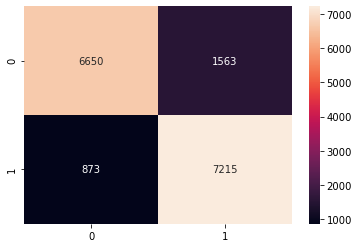

In [66]:
params_dt={'criterion':['gini','entropy'],
            'max_depth':[10,12,8,7,6],
            'min_samples_split':[7,9,10,12,15,20]}
dt=DecisionTreeClassifier()
m3=RandomizedSearchCV(dt,param_distributions=params_dt,scoring='accuracy',n_jobs=-1)
model_output(x,y,0.33,m3)

In [67]:
print(m3.best_params_)

{'min_samples_split': 10, 'max_depth': 12, 'criterion': 'gini'}


# 4)Random Forest Classifiers

shape of x_train is (33093, 12)
shape of y_train is (33093,)
shape of x_test is (16301, 12)
shape of y_test is (16301,)
training score of the model is : 0.933188287553259
confusion matrics of the model is is
 [[7111 1102]
 [ 843 7245]]
Classification report of the is
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      8213
           1       0.87      0.90      0.88      8088

    accuracy                           0.88     16301
   macro avg       0.88      0.88      0.88     16301
weighted avg       0.88      0.88      0.88     16301

accuracy score of given model is: 0.880682166738237
misclassification for the model is 0.11931783326176304


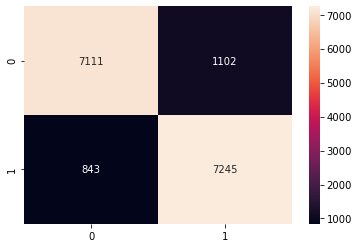

In [68]:
params_rf={'n_estimators':[10,50,80,30,100],'criterion':['gini','entropy'],
            'max_depth':[10,20,30,40],
            'min_samples_split':[5,10,15,20,25]}
rf=RandomForestClassifier()
m4=RandomizedSearchCV(rf,param_distributions=params_rf,scoring='accuracy',n_jobs=-1)
model_output(x,y,0.33,m4)

In [69]:
print(m4.best_params_)

{'n_estimators': 80, 'min_samples_split': 10, 'max_depth': 40, 'criterion': 'gini'}


# 5)SVM

shape of x_train is (33093, 12)
shape of y_train is (33093,)
shape of x_test is (16301, 12)
shape of y_test is (16301,)
training score of the model is : 0.6286828030096999
confusion matrics of the model is is
 [[7862  351]
 [5613 2475]]
Classification report of the is
               precision    recall  f1-score   support

           0       0.58      0.96      0.73      8213
           1       0.88      0.31      0.45      8088

    accuracy                           0.63     16301
   macro avg       0.73      0.63      0.59     16301
weighted avg       0.73      0.63      0.59     16301

accuracy score of given model is: 0.634132875283725
misclassification for the model is 0.365867124716275


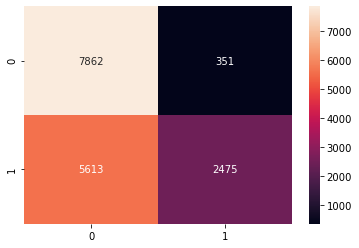

In [41]:
m5=SVC()
model_output(x,y,0.33,m5)

# Comparision of models based on accuracy

In [49]:
df_result=pd.DataFrame({'Models':['Logistic Regression','KNN Classifiers','Decision Tree Classifer','Random Forest Classifers','SVM'],'Accuracy_score':[0.7687871909698791,0.8296423532298632,0.8505613152567327,0.880682166738237,0.634132875283725]},index=[1,2,3,4,5])

In [50]:
df_result

Models  Accuracy_score
1       Logistic Regression        0.768787
2           KNN Classifiers        0.829642
3   Decision Tree Classifer        0.850561
4  Random Forest Classifers        0.880682
5                       SVM        0.634133

<b>Therefore by comparing the accuracy score, we can say that "Random Forest Classifier" is the best Model for the gievn data.</b>